IMPORTS

In [17]:
import pandas as pd
pd.option_context('display.max_rows', None, 'display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from itertools import chain, combinations
import warnings
warnings.filterwarnings(action='ignore')
sns.set_style('darkgrid')

%matplotlib inline

DATA

In [18]:
df = pd.read_csv('data/kc_house_data.csv', index_col=0) # (30155,25), 3 duplicated entries
print(f"Duplicates found and removed: * {df.loc[df.duplicated()].shape[0]} *")
df.drop_duplicates(inplace=True)
display(df.head())
display(df.tail())
df.info()

Duplicates found and removed: * 3 *


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908
9557800100,4/29/2022,500000.0,3,1.5,1200,11058,1.0,NO,NO,NO,...,PUBLIC,1200,0,420,0,1965,0,"18615 7th Avenue South, Burien, Washington 981...",47.435840,-122.32634


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30152 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30152 non-null  object 
 1   price          30152 non-null  float64
 2   bedrooms       30152 non-null  int64  
 3   bathrooms      30152 non-null  float64
 4   sqft_living    30152 non-null  int64  
 5   sqft_lot       30152 non-null  int64  
 6   floors         30152 non-null  float64
 7   waterfront     30152 non-null  object 
 8   greenbelt      30152 non-null  object 
 9   nuisance       30152 non-null  object 
 10  view           30152 non-null  object 
 11  condition      30152 non-null  object 
 12  grade          30152 non-null  object 
 13  heat_source    30120 non-null  object 
 14  sewer_system   30138 non-null  object 
 15  sqft_above     30152 non-null  int64  
 16  sqft_basement  30152 non-null  int64  
 17  sqft_garage    30152 non-null  int64

# EDA

Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

### Heatmap

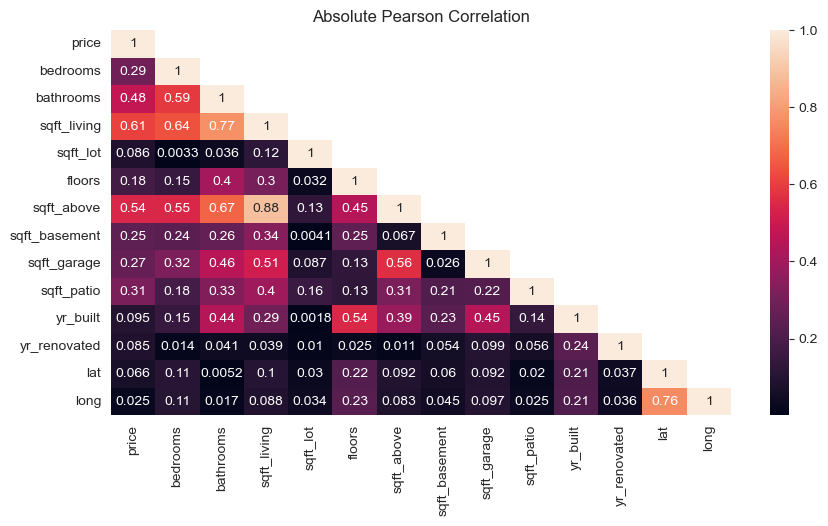

numeric abs(correlation) order: 
sqft_living      0.609931
sqft_above       0.540046
bathrooms        0.481199
sqft_patio       0.313629
bedrooms         0.290028
sqft_garage      0.265272
sqft_basement    0.245506
floors           0.179625
yr_built         0.095441
sqft_lot         0.086046
yr_renovated     0.085081
lat              0.066004
long             0.024826
Name: price, dtype: float64


In [23]:
corr_df = numeric_df.corr().abs()

fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('whitegrid')
mask = np.triu(np.ones_like(corr_df), k=1)
sns.heatmap(corr_df, annot=True, mask=mask, ax=ax).set(title='Absolute Pearson Correlation')

plt.show()
print("numeric abs(correlation) order: \n{}".format(corr_df['price'].sort_values(ascending=False)[1:]))

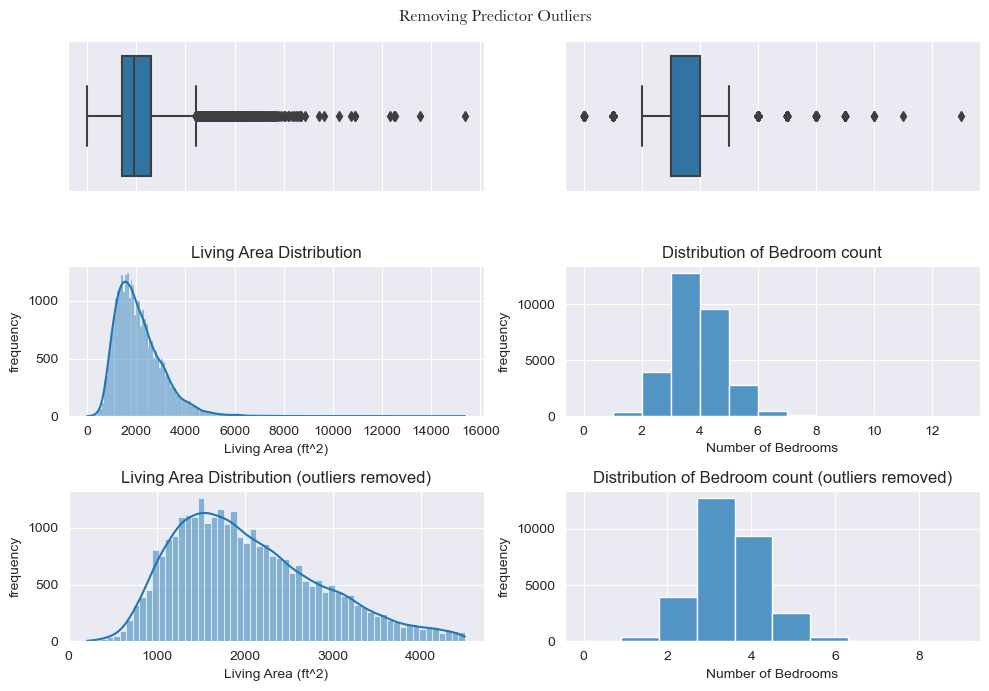

In [76]:
outlier_features = ['sqft_living', 'bedrooms']
outlier_df = numeric_df[outlier_features]
# remove outliers from bedroom, sqft_living
outlier_df = outlier_df.loc[df['bedrooms'] < 10]  
outlier_df = outlier_df.loc[(df['sqft_living'] <= 4500) & (df['sqft_living'] > 200)]  

sns.set_style('darkgrid')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,7))

fig.suptitle('Removing Predictor Outliers', fontfamily='Baskerville')
sns.boxplot(x='sqft_living', data=numeric_df, ax=ax[0][0])
ax[0][0].set_xticklabels([])
ax[0][0].set_xlabel('')
sns.boxplot(x='bedrooms', data=numeric_df, ax=ax[0][1])
ax[0][1].set_xticklabels([])
ax[0][1].set_xlabel('')

sns.histplot(x='sqft_living', data=numeric_df, kde=True, bins='auto', ax=ax[1][0])
ax[1][0].set_xlabel('Living Area (ft^2)')
ax[1][0].set_ylabel('frequency')
ax[1][0].set_title('Living Area Distribution')
sns.histplot(x='sqft_living', data=outlier_df, kde=True, bins='auto', ax=ax[2][0])
ax[2][0].set_xlabel('Living Area (ft^2)')
ax[2][0].set_ylabel('frequency')
ax[2][0].set_title('Living Area Distribution (outliers removed)')

sns.histplot(x='bedrooms', data=numeric_df,  bins=13, ax=ax[1][1])
ax[1][1].set_xlabel('Number of Bedrooms')
ax[1][1].set_ylabel('frequency')
ax[1][1].set_title('Distribution of Bedroom count')
sns.histplot(x='bedrooms', data=outlier_df,  bins=10, ax=ax[2][1])
ax[2][1].set_xlabel('Number of Bedrooms')
ax[2][1].set_ylabel('frequency')
ax[2][1].set_title('Distribution of Bedroom count (outliers removed)')

plt.tight_layout()
plt.show()

In [ ]:
# remove price outliers
df = df.loc[(df['price'] > 78000) & (df['price'] < 7000000)]



In [ ]:
# remove outliers from bedroom, sqft_living
df = df.loc[df['bedrooms'] <= 10]  
df = df.loc[(df['sqft_living'] <= 8000) & (df['sqft_living'] > 400)]  


# Train Test Split

In [ ]:
# numeric Train test split (.75 train, .25 test)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'), df[['price']], test_size=.25, random_state=42)